In [66]:
import pandas as pd
data = pd.read_csv("C:/Users/MR/Downloads/Compressed/archive/Book1.csv",index_col=0)
data = data.ffill()
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1/1/1900,60.0,35.0,0.0,52.0
1/2/1900,52.0,39.0,0.0,52.0
1/3/1900,52.0,35.0,0.0,53.0
1/4/1900,53.0,36.0,0.0,52.0
1/5/1900,52.0,35.0,0.0,50.0


In [67]:
data.shape

(13509, 4)

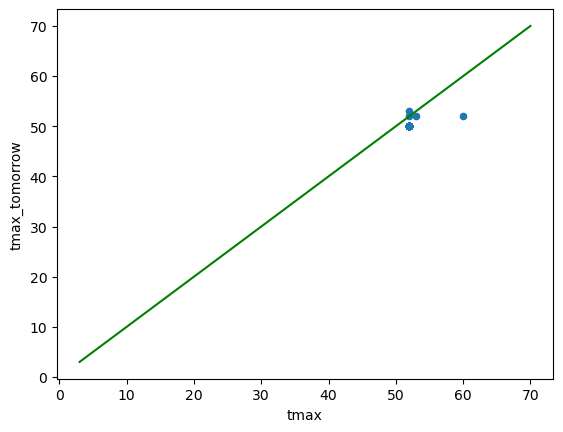

In [68]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot([3,70],[3,70],"green")

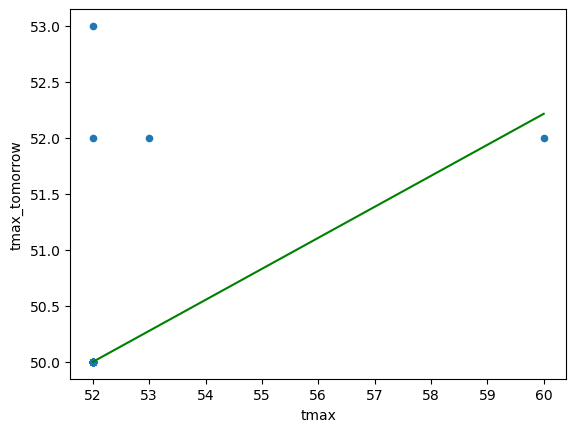

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[["tmax"]], data["tmax_tomorrow"])
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot(data["tmax"],lr.predict(data[["tmax"]]),color="green")

In [70]:
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

Weight: 0.28
Bias: 35.60


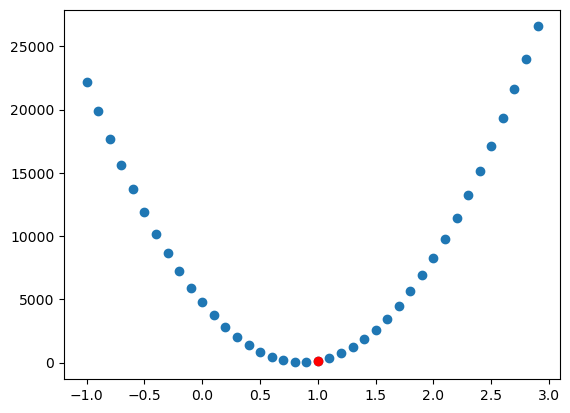

In [71]:
import numpy as np
loss = lambda w,y:((w*80+11.99)-y)**2
y=81
ws= np.arange(-1,3,.1)
losses= loss(ws,y)
plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')

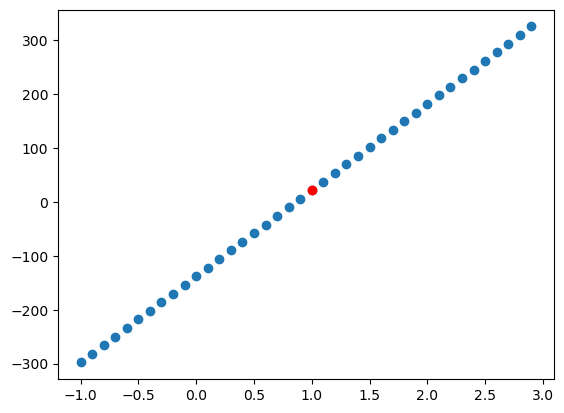

In [72]:
gradient = lambda w,y:((w*80+11.99)-y)*2
gradients = gradient(ws,y)
plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')

In [73]:
2*(((80*1)+11.99)-81)

21.97999999999999

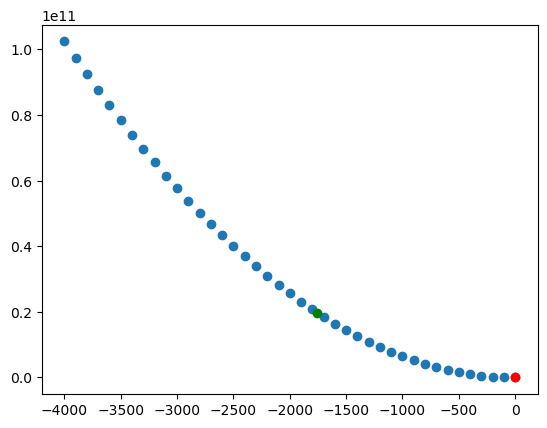

In [74]:
ws = np.arange(-4000,100,100)
losses= loss(ws,y)
plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')
new_weight= 1-gradient(1,y)*80
plt.plot(new_weight,loss(new_weight,y),'go')

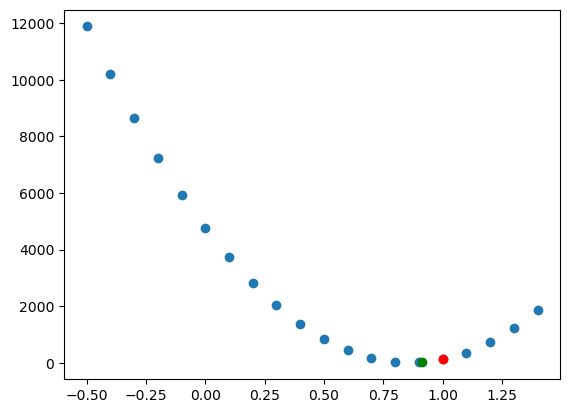

In [75]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws,y)
plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')
lr= 5e-5
new_weight=1-lr*gradient(1,y)*80
plt.plot(new_weight,loss(new_weight,y),'go')

In [76]:
new_weight


0.91208

In [77]:
import numpy as np
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

To train a linear regression algorithm using gradient descent, we need 4 elements:

A way to initialize our parameters (weights and biases)
A forward pass that computes predictions using the parameters
A loss function that measures the error of our predictions
A backward pass that updates our parameters to reduce the loss
To initialize our weight parameters, we can use random initialization. Random initialization helps the gradient descent algorithm descend to a global minimum efficiently (feel free to experiment with other initializations, like 0 or 1 to see what happens).

It's common to initialize the bias to be 1 or 0.

We'll shrink the initial parameter values so we don't end up with predictions that are too large (this can cause gradient descent to take steps that are too large).

In [78]:
import math

def init_params(predictors):
    # Initialize model parameters
    # k is a scaling factor that we use to reduce the weights and biases initially
    k = math.sqrt(1 / predictors)
    # We set a random seed so if we re-run this code, we get the same results
    np.random.seed(0)
    weights = np.random.rand(predictors, 1) * 2 * k - k
    biases = np.ones((1, 1)) * 2 * k - k
    return  [weights, biases]

We initialize one w
 value for each of our predictors (tmax, tmin, and rain). We initialize one bias for each target variable. In this case, we're only predicting one value for each row tmax_tomorrow, so we only have one bias.

In the forward pass of our network, we generate predictions by multiplying w,x
 and b
, then adding 
:

In [79]:
def forward(params, x):
    weights, biases = params
    # Multiply x values by w values with matrix multiplication, then add b
    prediction = x @ weights + biases
    return prediction

Once we have predictions, we need to calculate error. We have two functions, one to calculate the loss, and one to calculate the loss gradient (which helps us update our parameters):

In [80]:
def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return predicted - actual

In the backward pass of the network, we adjust 
 and 
 by the partial derivative times learning rate. We will make predictions for our whole training set, then average the gradient across the whole set to compute the updates. This will ensure that a single training example doesn't pull the gradient too far in one direction or another.

In [81]:
def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

Finally, we'll write a loop that:

Makes predictions for the whole training set
Computes the gradient for each training example
Updates the parameters based on the gradient
We will run the algorithm for several epochs - an epoch is each iteration over the training set. Up to a point, more epochs will improve the accuracy.

We will print out the loss on the validation set regularly so we can monitor the loss. We know we have too many epochs if the validation loss is increasing instead of decreasing.

In [82]:
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

# Store weights and gradients so we can visualize
# Not necessary for algorithm
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

Epoch 0 validation loss: 526.2864409014093
Epoch 10000 validation loss: 7.432548078787099e-09
Epoch 20000 validation loss: 7.456308423266585e-09
Epoch 30000 validation loss: 7.480028768190434e-09
Epoch 40000 validation loss: 7.50370899991163e-09


In [83]:
params

[array([[0.55350568],
        [0.58944831],
        [0.11866093]]),
 array([[0.58710023]])]

We can also visualize the path of gradient descent. We're limited to three dimensions, but we can look at w1
 (the weight for tmax) and w2
 (the weight for tmin) against the gradient. We can see that we started in an area of very negative gradient, where our predictions were lower than the actual temperatures. This happened because w1
 and w2
 were set to randomly initialized values. Both parameters then moved towards the global minimum over many epochs, as we tried to move to an area of 0 gradient.

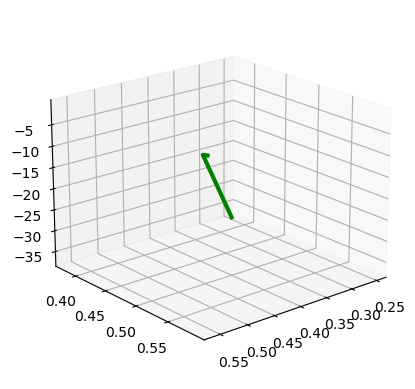

In [84]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3, zorder=10)

# Show the plot
plt.show()

In [85]:
predictions = forward(params, test_x)
mse(test_y, predictions)

7.5273466440785e-09

In practice, the interactions between neural network layers will be complex enough that you will likely not get to a global minimum. If the error is higher than you expect, you can try changing the learning rate (lowering it will take longer to converge, but may be more likely to reach a global minimum). You can also try re-initializing the layer weights and retrying gradient descent. Usually it is not a huge issue if you reach a local minimum instead of a global minimum, as long as your error is good enough for your application.

You should now understand how gradient descent works to update parameters. In this next notebook, we'll cover how to train a dense neural network using gradient descent! @thanks_dataquest_for_this_amazing_tutotrial_i_learn_alot